# Problem Set 5, due June 2nd 11:59pm (end of day).

As usual, you are highly encouraged to *start this problem set early!*  My best guess (no guarantees!) is that Part 1 will be conceptually easy but perhaps time consuming.  Parts 2 and 3 are medium difficult, but there are plenty of opportunities to get confused with python data structures, so if you're going to get stuck, get stuck (and unstuck) early! Part 4 will give you an opportunity to get some intuition with PCA.

Note that the two extra credit problems have the potential to be quite challenging and time consuming. Make sure to do everything else in the problem set before you tackle the extra credit.

To get started, download pset5.ipynb and the file "reviews.csv" from Canvas.

I suggest you to get familiar with 'groupby' and
_unique_ functions in 'numpy'.  You will probably also need
_CountVectorizer_ in 'sklearn.feature\_extraction.text' and
_MultinomialNB_ in 'sklearn.naive\_bayes'


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.naive_bayes as naby
import os


# Introduction

In this assignment, you'll be analyzing movie reviews in an attempt to
determine whether movies are good or bad.  The file "reviews.csv",
contains reviews from the [Rotten Tomatoes](http://www.rottentomatoes.com) website.  I've also put a file "movies.dat" on Canvas that contains metadata for ~65,000 different movies

If you've never seen Rotten Tomatoes before, go spend a few minutes familiarizing yourself with the website.  It's a meta-review website that aggregates movie reviews from a large number of critics.  Note in particular the section on "Critic Reviews" at the bottom -- that's the content that has been scraped and put in the reviews.csv file.  Also note that each movie is given a quantitative score on the Tomatometer which is used to classify the movie as either Fresh or Rotten.

Your mission is to develop a classifier to determine whether a movie is Fresh or Rotten based on the contents of the reviews given to the movie.  As before, we'll start out with some exploratory data analysis.

# 1 Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  Begin by loading the datasets and dropping rows that have missing data, either missing review or missing fresh/rotten indicator.

In [3]:
reviews_df=pd.read_csv("C:/Users/jakum/Documents/Quarter 3/ml/Assignments_export/PS5/reviews.csv")
reviews_df.columns
reviews_df=reviews_df[reviews_df.fresh.notnull()]
reviews_df=reviews_df[reviews_df.quote.notnull()]
file=open("C:/Users/jakum/Documents/Quarter 3/ml/Assignments_export/PS5/movies.dat")
movies=pd.read_table('C:/Users/jakum/Documents/Quarter 3/ml/Assignments_export/PS5/movies.dat')
#print(movies.columns)
#movies.dtypes


## 1.1 Basic features of the dataset

Answer the following questions by having your code directly print the
answers:

* How many unique reviews (quotes) are in the `reviews` dataset?
* How many unique reviewers (critics) are in the `reviews` dataset?
* How many unique movies are in the `reviews` dataset?
* How many unique movies are in the *`movies`* dataset?
* How many different publications have reviews in the `reviews` dataset?


In [4]:
# enter your code below
print("No of unique quotes:",sum(pd.value_counts(reviews_df.quote.unique())))
print("No of unique critics:",sum(pd.value_counts(reviews_df.critic.unique())))
print("No of unique movies:",sum(pd.value_counts(reviews_df.title.unique())))
print("No of unique movies from movies:",sum(pd.value_counts(movies.title.unique())))
print("No of unique publications:",sum(pd.value_counts(reviews_df.publication.unique())))

No of unique quotes: 12836
No of unique critics: 540
No of unique movies: 1720
No of unique movies from movies: 9405
No of unique publications: 64


## 1.2 Number of reviews per reviewer

Using the `reviews` dataset, create a histogram showing the distribution of the number of reviews per reviewer.  Create the bin width (x-axis) to be 1 unit wide, and the range of the axis to be from 0 to 30.  Scale the y-axis to show the logarithm of (count of) the number of reviews.  Label your axes and make your histogram look professional.

Does the distribution look normal?  Is it what you expect?

1


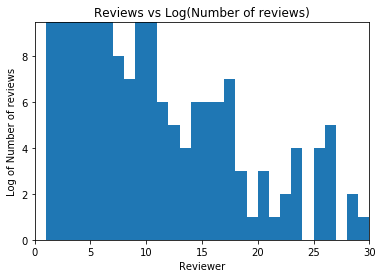

In [5]:
# enter your code here
import math
hist_df=reviews_df.groupby('critic').count()
print(min(hist_df.quote))
hist_df=reviews_df.groupby('critic').count()
plt.hist(hist_df['quote'],bins=range(min(hist_df.quote),max(hist_df.quote)+1,1))
plt.xlim([0,30])
plt.ylim([0,math.log(hist_df.quote.sum())])
plt.xlabel('Reviewer')
plt.ylabel('Log of Number of reviews')
plt.title('Reviews vs Log(Number of reviews)')

The distribution does not look normal. I did not expect the hist to look normal. I expected the histogram to look uniformly distibuted for each reviewer. That is, each reviews having equal number of reviews, atleast the top 30.

## 1.3 Take a closer look of a few reviews

Find the 30 critics with the most reviews, and list their names in a table along with (a) the name of the publication they work for, (b) the date of their first review, and (c) the date of their last review

*hint: use the groupby function*

In [6]:
# enter your code here
#hist_df
top30=pd.DataFrame(reviews_df.groupby(['critic','publication','review_date']).count())
top30.sort('quote',ascending=0).head(30)

C:\Users\jakum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


fresh  imdb  \
critic             publication             review_date                        
Roger Ebert        Chicago Sun-Times       2000-01-01 00:00:00    873   873   
James Berardinelli ReelViews               2000-01-01 00:00:00    702   702   
Desson Thomson     Washington Post         2000-01-01 00:00:00    318   318   
Janet Maslin       New York Times          2003-05-20 00:00:00    228   228   
                                           2000-01-01 00:00:00    218   218   
Rita Kempley       Washington Post         2000-01-01 00:00:00    209   209   
Joe Baltake        Sacramento Bee          2000-01-01 00:00:00    187   187   
Hal Hinson         Washington Post         2000-01-01 00:00:00    168   168   
Geoff Andrew       Time Out                2006-06-24 00:00:00    164   164   
Susan Stark        Detroit News            2000-01-01 00:00:00    162   162   
Mick LaSalle       San Francisco Chronicle 2000-01-01 00:00:00    154   154   
Vincent Canby      New York Times          2003-05-20 00:00:00    134   134   
Geoff Andrew       Time Out                2006-02-09 00:00:00    134   134   
Kenneth Turan      Los Angeles Times       2001-02-14 00:00:00    133   133   
Roger Ebert        Chicago Sun-Times       2004-10-23 00:00:00    128   128   
Stephen Holden     New York Times          2000-01-01 00:00:00    108   108   
Peter Stack        San Francisco Chronicle 2000-01-01 00:00:00     89    89   
Variety Staff      Variety                 2009-03-26 00:00:00     88    88   
Derek Adams        Time Out                2006-06-24 00:00:00     87    87   
Edward Guthmann    San Francisco Chronicle 2000-01-01 00:00:00     82    82   
Bosley Crowther    New York Times          2003-05-20 00:00:00     79    79   
Mick LaSalle       San Francisco Chronicle 2002-06-18 00:00:00     73    73   
Owen Gleiberman    Entertainment Weekly    2000-01-01 00:00:00     72    72   
Kevin Thomas       Los Angeles Times       2001-02-14 00:00:00     69    69   
Rick Groen         Globe and Mail          2002-04-12 00:00:00     67    67   
Lisa Schwarzbaum   Entertainment Weekly    2000-01-01 00:00:00     64    64   
Charles Taylor     Salon.com               2000-01-01 00:00:00     63    63   
Jonathan Rosenbaum Chicago Reader          2000-01-01 00:00:00     61    61   
Janet Maslin       New York Times          2004-08-30 00:00:00     60    60   
Roger Ebert        At the Movies           2000-01-01 00:00:00     57    57   

                                                                link  quote  \
critic             publication             review_date                        
Roger Ebert        Chicago Sun-Times       2000-01-01 00:00:00   873    873   
James Berardinelli ReelViews               2000-01-01 00:00:00   702    702   
Desson Thomson     Washington Post         2000-01-01 00:00:00   318    318   
Janet Maslin       New York Times          2003-05-20 00:00:00   228    228   
                                           2000-01-01 00:00:00   218    218   
Rita Kempley       Washington Post         2000-01-01 00:00:00   209    209   
Joe Baltake        Sacramento Bee          2000-01-01 00:00:00   187    187   
Hal Hinson         Washington Post         2000-01-01 00:00:00   168    168   
Geoff Andrew       Time Out                2006-06-24 00:00:00   164    164   
Susan Stark        Detroit News            2000-01-01 00:00:00   162    162   
Mick LaSalle       San Francisco Chronicle 2000-01-01 00:00:00   154    154   
Vincent Canby      New York Times          2003-05-20 00:00:00   134    134   
Geoff Andrew       Time Out                2006-02-09 00:00:00   134    134   
Kenneth Turan      Los Angeles Times       2001-02-14 00:00:00   133    133   
Roger Ebert        Chicago Sun-Times       2004-10-23 00:00:00   128    128   
Stephen Holden     New York Times          2000-01-01 00:00:00   108    108   
Peter Stack        San Francisco Chronicle 2000-01-01 00:00:00    89     89   
Variety Staff      Variety        

## 1.4 Ratings over time

Using the `movies` dataset, create a plot that shows how the average rating per movie (rtAllCriticsRating) has evolved over time.  Do this by creating a scatterplot where the x-axis is the year in which the movie was released and the y-axis is rtAllCriticsRating.  Drop movies with 0 or unknown values to avoid biasing your results.  Then, create a scatterplot that has one <year,rating> point for each remaining movie, and pick an appropriate size/color/transparency for these points to ensure that the graph looks professional.  In other words, do not simply use the default settings, as this will produce a dense mess of dots that will be hard to interpret.  Finally, overlay on this scatterplot a line graph in red showing how the average movie rating (the average of rtAllCriticsRating across all movies in a year) has changed over time.  Do you notice a trend?  What do you think it means?

C:\Users\jakum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


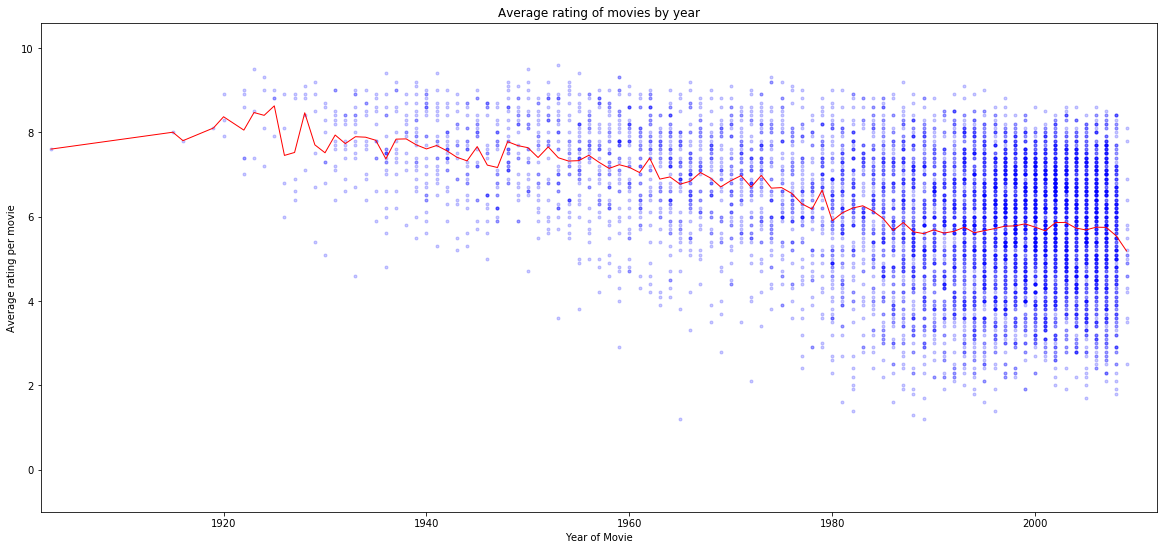

In [7]:
# enter your code here
rating_int = movies.rtAllCriticsRating.convert_objects(convert_numeric=True)
del movies['rtAllCriticsRating']
movies['rtAllCriticsRating'] = rating_int
plt.figure(figsize=(20,9))
plt.scatter(movies.year[movies.rtAllCriticsRating>0], movies.rtAllCriticsRating[movies.rtAllCriticsRating>0],alpha=0.2,color='blue',s=9)
plt.ylim([movies.rtAllCriticsRating.min()-1,movies.rtAllCriticsRating.max()+1])
plt.xlim([movies.year.min()-1,movies.year.max()+1])

avg_ratings = movies[movies.rtAllCriticsRating>0].groupby('year')['rtAllCriticsRating'].mean()
plt.plot(avg_ratings.index, avg_ratings, 'red',  linewidth = 1)
plt.xlabel("Year of Movie")
plt.ylabel("Average rating per movie")
plt.title("Average rating of movies by year")

In [ ]:
Over time, the culture of movie reviewing seems to have gotten popular. With more people reviewing, the ratings fall into a wider
spectrum over time.This seems to have brought down the average rating in general. The plot is denser as years progress and 
trend lines are on a downward slide.

# Part 2: Naive Bayes

Now it gets fun!  You are going to use a Naive Bayes classifier to build a prediction model for whether a review is fresh or rotten, depending on the text of the review. 

## 2.0 Using CountVectorizer

One thing that may help you in the following problems is the _CountVectorizer_ object in Scikit-learn.  This will help you convert your raw text fields into "bag of words" vectors, i.e. a data structure that tells you how many times a particular word appears in the text.  (Note: the order of wordss is not preserved in the bag).   Here's a simple example, make sure you understand what's going on!

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["Next morning when I awakened I found Jem and Dill in the back yard deep in conversation.", "When I joined them, as usual they said go away.", "Will not.", "This yard's as much mine as it is your, Jem Finch.", "I got just as much right to play in it as you have."]
# Harper Lee "To Kill a Mockingbrid"
print ("Original text:\n", '\n'.join(sentences))

vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(sentences)
# `fit` builds the vocabulary
x = vectorizer.transform(sentences).toarray()
# `transform` converts text to a bag of words
print ("Transformed text vector:\n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print ("Words for each feature:")
print (vectorizer.get_feature_names())

Original text:
 Next morning when I awakened I found Jem and Dill in the back yard deep in conversation.
When I joined them, as usual they said go away.
Will not.
This yard's as much mine as it is your, Jem Finch.
I got just as much right to play in it as you have.
Transformed text vector:
 [[1 0 1 0 1 1 1 1 0 1 0 0 0 2 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
  0]
 [0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
  0]
 [0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
  1]
 [0 2 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1
  0]]
Words for each feature:
['and', 'as', 'awakened', 'away', 'back', 'conversation', 'deep', 'dill', 'finch', 'found', 'go', 'got', 'have', 'in', 'is', 'it', 'jem', 'joined', 'just', 'mine', 'morning', 'much', 'next', 'not', 'play', 'right', 'said', 'the', 'them', 'they', 'this', 'to', 'usual', 'when', '

## 2.1 Create your X input and Y output

Using the `reviews` dataframe, compute a pair of numerical X, Y arrays where:
    
 * X is a `(nreview, nwords)` array. Each row is the bag-of-words representation for a single review.  This will be the *input* (fetaures) of your model.
 * Y is a `nreview`-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired *output* (target) from your model.
 
 Make sure to remove items with no review text

Feel free to use the _make\_xy_ function below to achieve it, but you can also create your own parser.

In [9]:
"""
Function
--------
make_xy

Build a bag-of-words training set for the review data

Parameters
-----------
reviews : Pandas DataFrame
    The review data from above
    
vectorizer : CountVectorizer object (optional)
    A CountVectorizer object to use. If None,
    then create and fit a new CountVectorizer.
    Otherwise, re-fit the provided CountVectorizer
    using the reviews data
    
Returns
-------
X : numpy array (dims: nreview, nwords)
    Bag-of-words representation for each review.
Y : numpy array (dims: nreview)
    1/0 array. 1 = fresh review, 0 = rotten review

Examples
--------
X, Y = make_xy(reviews)
"""
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    Y = (critics.fresh == 'fresh').values.astype(np.int)
    return X, Y

X,Y=make_xy(reviews_df)
print(Y)


[1 1 1 ..., 1 0 0]


## 2.2 Test-Train split

Next, randomly split the data into two groups: a training (75%) set and a validation set (25%).  You can do this manually, as you have done earlier, but I recommend to use `train_test_split` in 'sklearn.model_selection'.

In [10]:
# enter your code here
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 1)

## 2.3 Naive Bayes with `MultinomialNB`
Use the training set to train a Naive Bayes classifier using the `MultinomialNB` from 'sklearn'.  Play with _MultinomialNB_ parameters.  Report the accuracy of this model on both the training and testing data.  What do you observe?  Interpret these results!

*Hint: This shouldn't take more than 5-10 lines of code to accomplish*



In [11]:
# enter your code here
#no smoothening
model=naby.MultinomialNB(alpha=0)
model.fit(X_train,Y_train)

print('Accuracy on training set in %',(1-(abs(model.predict(X_train)-Y_train).sum())/float(len(Y_train)))*100)

print('Accuracy on test set in %',(1-(abs(model.predict(X_test)-Y_test).sum())/float(len(Y_test)))*100)

#with smoothening

model=naby.MultinomialNB(alpha=1)
model.fit(X_train,Y_train)

print('Accuracy on training set in %',(1-(abs(model.predict(X_train)-Y_train).sum())/float(len(Y_train)))*100)

print('Accuracy on test set in %',(1-(abs(model.predict(X_test)-Y_test).sum())/float(len(Y_test)))*100)

Accuracy on training set in % 96.0817379228
Accuracy on test set in % 57.810175543
Accuracy on training set in % 92.2725920048
Accuracy on test set in % 76.8521273431


C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


I have modified the alpha parameter to check for smoothening and non smoothening. Accuracy improves significantly with smoothening. Specifically with test set, accuracy improves with smoothening. The classifier performs at a decent level for test set with smoothening. Without smoothening, it does not perform well. This makes it a little skeptcial about its performance in real time.

## 2.4 (EXTRA CREDIT) Naive Bayes from Scratch!

That was almost too easy, right?  Right.

Your next mission, if you feel you want to take an extra challenge, is to write your own Naive Bayes classifier without relying on `MultinomialNB` or a similar pre-written package.  In addition to the lecture notes and assigned readings, I highly recommend that you review Michael Collin’s lecture notes on Naïve Bayes before starting (available on Canvas).  

**Note:** Do this *after* you have finished the rest of the problem set.  It is very rewarding, but can also be quite time-consuming!

*Hint: You will benefit most from this exercise if you attempt to write the algorithm directly from the lecture notes.  That said, if you really get stuck, Krishnamurthy Viswanathan has written a simple version of [NB in python](http://ebiquity.umbc.edu/blogger/2010/12/07/naive-bayes-classifier-in-50-lines/), which you can peek at if you really get stuck.*

In [42]:
# Your code here

# 3 Evaluation

## 3.1 Estimate the likelihood of your data

Calculate log-likelihood of a fitted model.  Log-likelihood is a way to assess the performance of your model.  Remeber -- likelihood is more-or-less the probability to observe your data (including your target).  Below is an example function that calculates the log-likelihood of an estimated model using `fitted_model.predict_logproba`.  You may use this function, or write your own.  

In [12]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 

The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews.

Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(model, x, y):
    prob = model.predict_log_proba(x)
    # returns Nx2 array.  Columns are log(Pr(y == 0|x)), log(Pr(y==1|x))
    ll = prob[y == 0, 0].sum() + prob[y == 1, 1].sum()
    return ll

print('Log likelihood of training data=',log_likelihood(model, X_train, Y_train))
print('Log likelihood of test data=',log_likelihood(model, X_test, Y_test))

Log likelihood of training data= -1885.73600988
Log likelihood of test data= -1944.30743046


## 3.2 Cross-Validation

Why do we care about the log-likelihood of our data?  You guessed it: Cross-Validation.

Our classifier has a few hyperparameters. The two most important are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The `alpha` keyword in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters.  The objective function we want to maximize is the log-likelihood of our data.  Fill in the remaining code in this block, to loop over many values of `alpha` and `min_df` to determine
which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, `sklearn.model_selection.cross_val_score`, that might save you a lot of time here...*

In [13]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

alpha=None
mindf = None
likelihood=-np.inf

for i in alphas:
    for j in min_dfs:
        vector=CountVectorizer(min_df=j)
        X,Y=make_xy(reviews_df,vector)
        model=naby.MultinomialNB(alpha=i).fit(X,Y)
        score=cross_val_score(model,X,Y,cv=5,scoring=log_likelihood).mean()
        if score>likelihood:
            likelihood=score
            alpha=i
            mindf=j

print(likelihood)
print(alpha)
print(mindf)

C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:410: RuntimeWarning: invalid value encountered in subtract
  out = np.log(np.sum(np.exp(arr - vmax), axis=0))
C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:410: RuntimeWarning: invalid value encountered in subtract
  out = np.log(np.sum(np.exp(arr - vmax), axis=0))
C:\Users\jakum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.fea

-1471.49559373
5
0.001


## 3.3 Putting it together

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the steps in 2.1-2.3 to train a final classifier with these parameters and re-evaluate the accuracy.  Discuss the various ways in which Cross-Validation has affected the model. Is the new model more or less accurate? Is overfitting better or worse?

In [14]:
#Enter your code here
def make_xy_optimize(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=mindf)
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    Y = (critics.fresh=='fresh').values.astype(np.int)
    names=np.array(vectorizer.get_feature_names())
    return X,Y,names

X,Y,names=make_xy_optimize(reviews_df)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.25,random_state = 1)

model=naby.MultinomialNB(alpha=alpha)
model.fit(X_train,Y_train)

print('Accuracy on training set in %',(1-(abs(model.predict(X_train)-Y_train).sum())/float(len(Y_train)))*100)

print('Accuracy on test set in %',(1-(abs(model.predict(X_test)-Y_test).sum())/float(len(Y_test)))*100)

print(log_likelihood(model, X_train, Y_train))
print(log_likelihood(model, X_test, Y_test))


Accuracy on training set in % 79.317528023
Accuracy on test set in % 73.8470693246
-4437.24185102
-1821.5617994


The new model is more accurate with the test set which makes the new model better and more realistic. The accuracy seems to be in the same range over test set and training set which makes the new model more reliable. Overfitting in this case has imporved the model.

### 3.4 (Extra Credit)

What happens if you tried this again using a function besides the log-likelihood -- for example, the classification accuracy?  Interpret these results

In [9]:
# Enter your code here



## 3.5 Interpretation

What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [15]:
# Enter your code here
identity_m=np.identity(X_test.shape[1])
p=model.predict_proba(identity_m)[:,0]
index=np.argsort(p)
goodwords=names[index[:10]]
badwords=names[index[-10:]]
badwords=badwords.tolist()[::-1]
badwords=np.array(badwords)
goodprob=1-p[index[:10]]
badprob=p[index[-10:]]
badprob=badprob.tolist()[::-1]
badprob=np.array(badprob)
word_list=np.column_stack((goodwords,goodprob*100,badwords,badprob*100))
word_df=pd.DataFrame(word_list,columns = ['Fresh Word','Fresh possibility(%)','Rotten Word','Rotten possibility(%)'])
word_df

,Fresh Word,Fresh possibility(%),Rotten Word,Rotten possibility(%)
0,delight,89.37564579016171,unfortunately,84.72678105609151
1,masterpiece,89.22517596890319,pointless,83.1794766451693
2,touching,88.52066857396042,uninspired,79.97650825255067
3,stunning,87.23679664923908,disappointment,79.84860042921146
4,beautiful,85.70160091593958,dull,79.18374076270356
5,remarkable,85.62957939243643,bland,78.5779265076986
6,superb,85.62957939243643,lame,77.39368844926959
7,rare,85.48333754535726,flat,76.89701477120138
8,powerful,85.15369821369518,forced,76.89701477120138
9,performance,84.95600503355615,unfunny,76.89701477120138


###3.6 Error Analysis

One of the best sources for inspiration when trying to improve a model is to look at examples where the model performs poorly.  Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.

What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? In your answer, report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".

In [11]:
#Your code here


##Part 4: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [16]:
from sklearn.datasets import load_boston
bdata = load_boston()
bdata_df = pd.DataFrame(data= np.c_[bdata['data'],bdata['target']],
                        columns=np.append(bdata['feature_names'],['target']))
bdata_m = bdata_df.as_matrix()

###4.1 Remember the last problem set?

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  If you didn't get full credit for this on the first problem set, get full credit this time!

Then, just as you did on the previous problem set, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

(506, 14)
Coef of housing price on number of rooms: [ 9.10210898]
intercept of housing price on number of rooms: -34.6706207764
RMSE: 9.23916143725


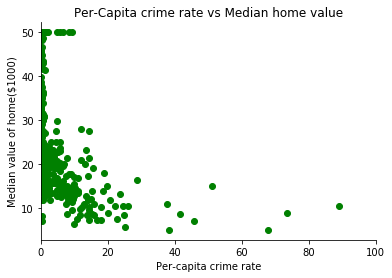

In [17]:
# Enter your code here
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
bdata_df.head(5)
plt.scatter(bdata_df.CRIM,bdata_df.target,color='green')
plt.xlim(0,100)
plt.xlabel('Per-capita crime rate')
plt.ylabel('Median value of home($1000)')
plt.title('Per-Capita crime rate vs Median home value')
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none') 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

model=LinearRegression()
print(bdata_m.shape)
X=bdata_m[:,5]
Y=bdata_m[:,13]
#print(X.shape)
#print(Y.shape)
model.fit(X.reshape(len(X),1),Y.reshape(len(Y),1))
#print ("residuals",model.residues_)

print("Coef of housing price on number of rooms:",model.coef_)
print("intercept of housing price on number of rooms:",model.intercept_)

def compute_rmse(predicts,yvals):
    i=0 #i used to move array index
    result=np.zeros((predicts.size,1))
    for n in predicts:
        result[i]=predicts[i]-yvals[i] #computing difference between predicted and observed values
        result[i]=result[i]*result[i] #computing square root of each difference
        i=i+1 
    rmse=result.sum()
    rmse=rmse/(result.size)
    rmse=np.sqrt(rmse) #obtaining root mean
    return rmse

X_train,X_test=sklearn.model_selection.train_test_split(bdata_m,test_size=0.34,train_size=0.66)


def bivariate_ols(X,Y,R,MaxIterations):
    N=len(X)
    it=0
    cost=0
    convergence=False
    tolerance=0.02
   
    coef=[0,0]
    beta=np.zeros((506,1))
    gradient=0
    for i in range(MaxIterations):
        h=np.dot(X,beta)
        l=h-Y
        g1=gradient #gradient from previous iteration
        cost=np.asscalar(np.matmul(l.T, l))
        gradient=np.dot(l.T,X)/N
        g2=gradient
        beta=beta-R*gradient
        coef[0]=np.average(l)
        coef[1]=np.average(beta)
        if ((g2-g1)==0):
            convergence=True
        if(g2>(-9.82e-05)):
            convergence=True
            return beta,l,i,convergence,coef
    coef[0]=np.average(l)
    coef[1]=np.average(beta)
    return beta,l,i,convergence,coef

slope,intercept,iterations,convergence,coef=bivariate_ols(X,Y,0.0001,10001)


predicts=np.zeros(len(X_test))
e=coef[0]
b1=coef[1]
X_test=np.matrix(X_test)
var1=np.matrix(X_test[:,1])
yvals=np.matrix(X_test[:,13])
for i in range(len(yvals)):
    predicts[i]=e+b1*var1[i]
    i=i+1
#print(predicts)
#print(yvals)
print("RMSE:",compute_rmse(predicts,yvals))


###4.2 So many scatterplots!

Choose 8 out of the of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

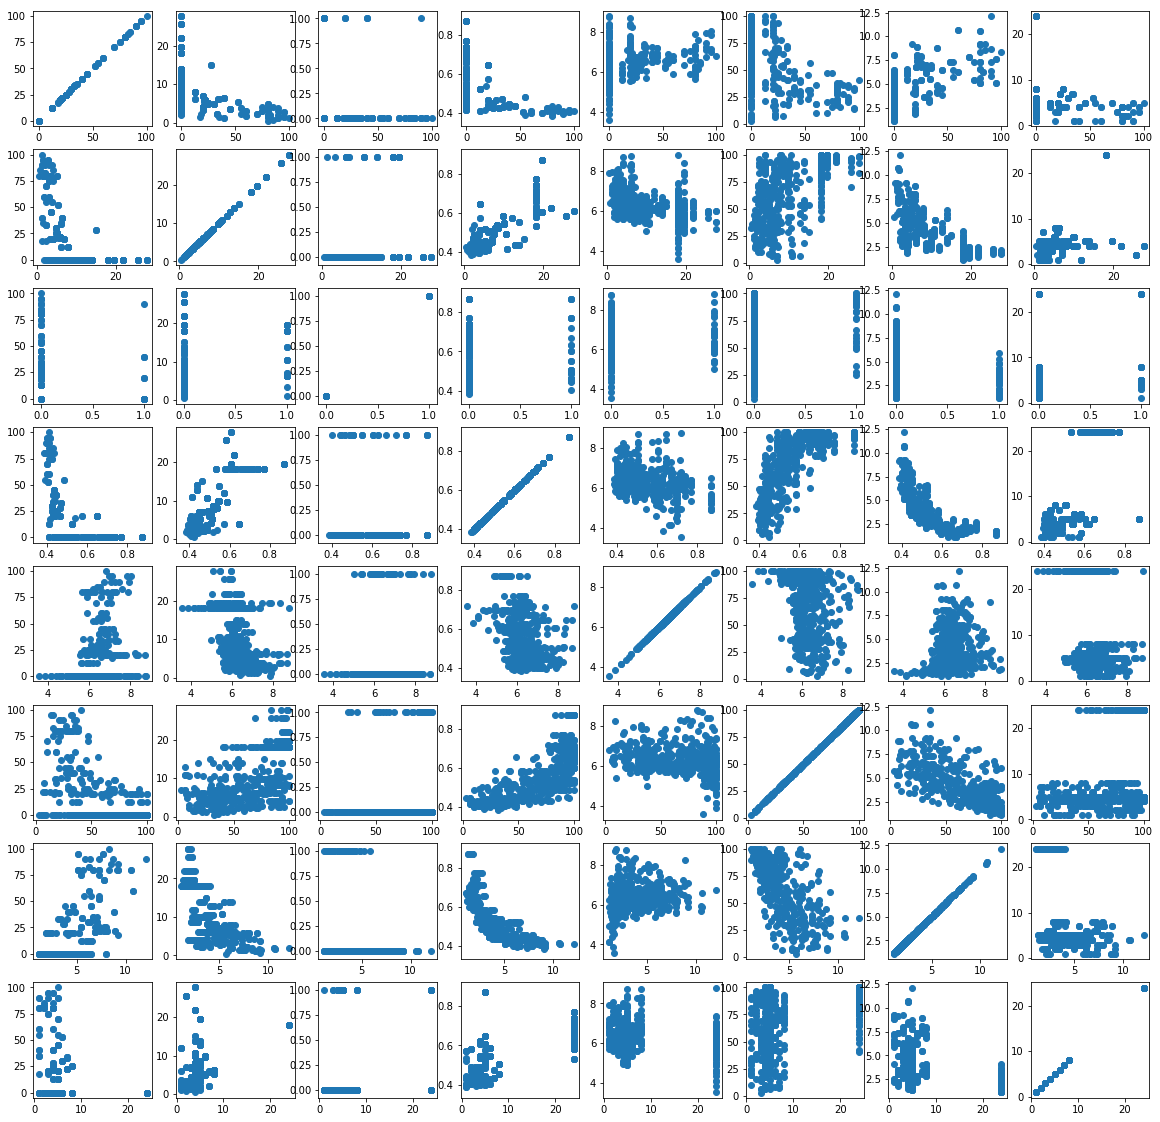

In [18]:
bdata_f = bdata_m[:,(1, 2, 3, 4, 5, 6, 7, 8)]
plt.figure(figsize=(20,20))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        plt.scatter(bdata_f[:,i],bdata_f[:,j])

###4.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

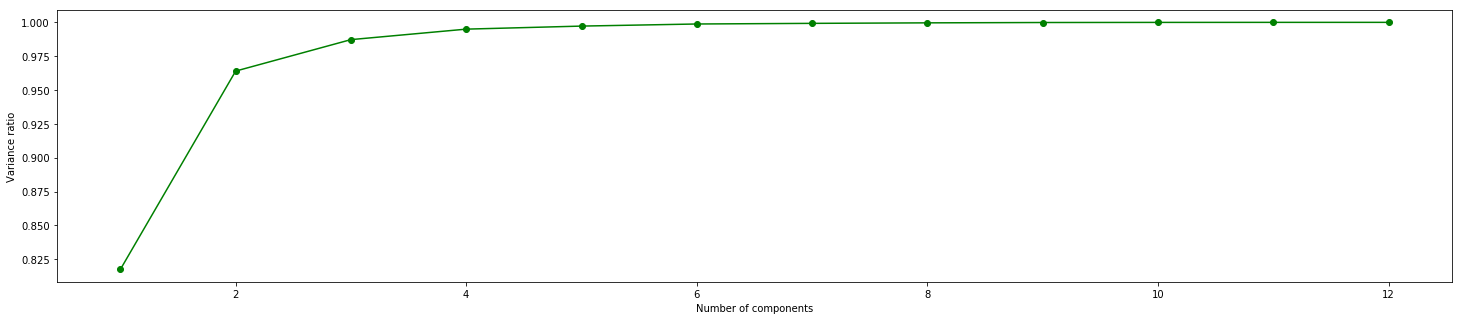

In [20]:
# Enter your code here
plt.figure(figsize=(25,5))
pca = PCA(n_components=12)
pca.fit(X_train)
result = pca.explained_variance_ratio_
yax = []
sum=0
for i in result:
    sum+=i
    yax.append(sum)
xax=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(xax,yax,marker='o', color='g')
plt.xlabel("Number of components")
plt.ylabel("Variance ratio")
plt.show()


###4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

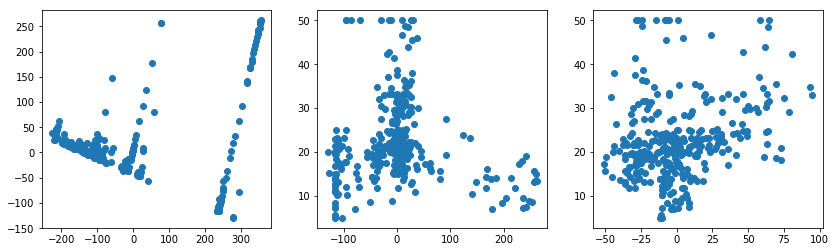

In [21]:
X_train, X_test, y_train, y_test = train_test_split(bdata_m[:,0:13], bdata_m[:,13], test_size = 0.34, random_state = 1)
data=pca.fit_transform(X_train)
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,3,1)
ax1 = plt.scatter(data[:,0],data[:,1])
ax2 = fig.add_subplot(1,3,2)
ax2 = plt.scatter(data[:,1],y_train)
ax3 = fig.add_subplot(1,3,3)
ax3 = plt.scatter(data[:,2],y_train)

###4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 4.1?  Interpret your results!

In [22]:
X_train, X_test, y_train, y_test = train_test_split(bdata_m[:,0:13], bdata_m[:,13], test_size = 0.34, random_state = 1)
data_train=pca.fit_transform(X_train)
data_test=pca.fit_transform(X_test)
model=LinearRegression()
#model.fit(data_train[0,1],Y_train)
model.fit(data_train[:,0:1], y_train)
predtrain = model.predict(data_train[:,0:1])
predtest = model.predict(data_test[:,0:1])
print("RMSE on training set:",compute_rmse(predtrain,y_train))
print("RMSE on test set:",compute_rmse(predtest,y_test))

RMSE on training set: 8.09926699078
RMSE on test set: 7.9019883182


The RMSE on data using PCA is lower than the model trained in 4.1. It is lower by a point. This is expected behaviour as we neglect those features that are not important/significant anymore.